# Pima Indians Diabetes Database

## Introduction:
 In this project, our objective is to predict whether a patient has diabetes or not based on various factors using the Pima Indians Diabetes Database. It can be found [Click here](1https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

By analyzing features like pregnancies, glucose level, blood pressure, and more, we aim to develop a model that can help diagnose diabetes accurately.

## Task 1: Prerequisite Exploratory Data Analysis (EDA)
In this task, our goal is to perform exploratory data analysis to gain a thorough understanding of the dataset we will be working on. This involves examining the data's structure, distribution, and relationships between variables.

## Task 2: Fit Logistic Model and Analyze
In this task, we will fit an appropriate logistic model to the dataset. The logistic model will be trained on the available data to predict whether a patient has diabetes or not. After fitting the model, we will analyze its performance and evaluate its accuracy in predicting diabetes.

In [100]:
#import necesarry libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency
import math
from sklearn.metrics import precision_score, recall_score, accuracy_score


from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [131]:
# read the data 
data = pd.read_csv('diabetes_trim_data.csv')
data.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5.0,144,82.0,26.0,285.0,32.0,0.452,58.0,1
1,5.0,137,108.0,0.0,0.0,48.8,0.227,37.0,1
2,5.0,109,75.0,26.0,0.0,36.0,0.546,60.0,0
3,3.0,113,50.0,10.0,85.0,29.5,0.626,25.0,0
4,2.0,96,68.0,13.0,49.0,21.1,0.647,26.0,0
5,0.0,105,64.0,41.0,142.0,41.5,0.173,22.0,0
6,0.0,180,78.0,63.0,14.0,59.4,2.420,25.0,1
7,4.0,189,110.0,31.0,0.0,28.5,0.680,37.0,0
8,9.0,145,88.0,34.0,165.0,30.3,0.771,53.0,1
9,7.0,179,95.0,31.0,0.0,34.2,0.164,60.0,0


In [3]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

## Domain Understanding:

The data in the Pima Indians Diabetes Database was collected by the National Institute of Diabetes and Digestive and Kidney Disease. It focuses on females who are at least 21 years old and have Pima Indian heritage. The dataset aims to predict the occurrence of diabetes based on various factors such as pregnancy history, BMI, glucose level, skin thickness, insulin measurement, age, and blood pressure.

Data Description:

Pregnancies: The total number of pregnancies a female has.

Glucose: The amount of glucose in the blood throughout a two-hour period during an oral glucose tolerance test.

Diastolic blood pressure is measured in "mm Hg" by blood pressure.

Triceps skin fold thickness is measured in "mm" by skinThickness.

2-hour serum insulin is measured in "mu U/ml" for insulin.

BMI stands for body mass index (weight in kg/(height in m)2).

DiabetesPedigreeFunction: A function that assesses the likelihood of diabetes based on a person's family history.

Age: The female's age in years.


In [11]:
# count, mean, std, min, 25%, 50%, 75%, max for all entries except Outcome
basic_stats = data.loc[:, data.columns != 'Outcome'].describe()

# There are 273 people with diabetes
num_diabetes = len(data.loc[data['Outcome'] == 1])
print("Number of people with diabetes:", num_diabetes)

# Double-checking that the Outcome is only 0s and 1s
is_binary = (len(data.loc[data['Outcome'] == 0]) + len(data.loc[data['Outcome'] == 1])) == len(data)

# Calculate the median of the data
median_per_column = {}
for col in data.loc[:, data.columns != 'Outcome']:
    median_per_column[col] = data[col].median()

median_per_column = pd.DataFrame(median_per_column, index=['Median'])
##We can readily identify certain outliers and maybe missing values by examining the maximum and minimum values.
##In the subsequent steps, we will look into these.

# Concatenate the basic stats dataframe with the calculated median
stats_with_median = pd.concat([basic_stats, median_per_column])
stats_with_median

Number of people with diabetes: 273


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000
mean,3.841635,121.280971,70.726692,20.968072,82.762452,32.360409,0.470271,34.444444
std,3.366824,32.325356,31.374634,18.732339,121.761453,11.463401,0.330093,25.167961
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,63.000000,0.000000,0.000000,27.350000,0.242000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.370000,29.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.600000,0.625000,41.000000
max,17.000000,199.000000,504.000000,273.000000,846.000000,264.600000,2.420000,567.000000
Median,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.370000,29.000000


## Visualize the most significant or fascinating aspects using the right methods.


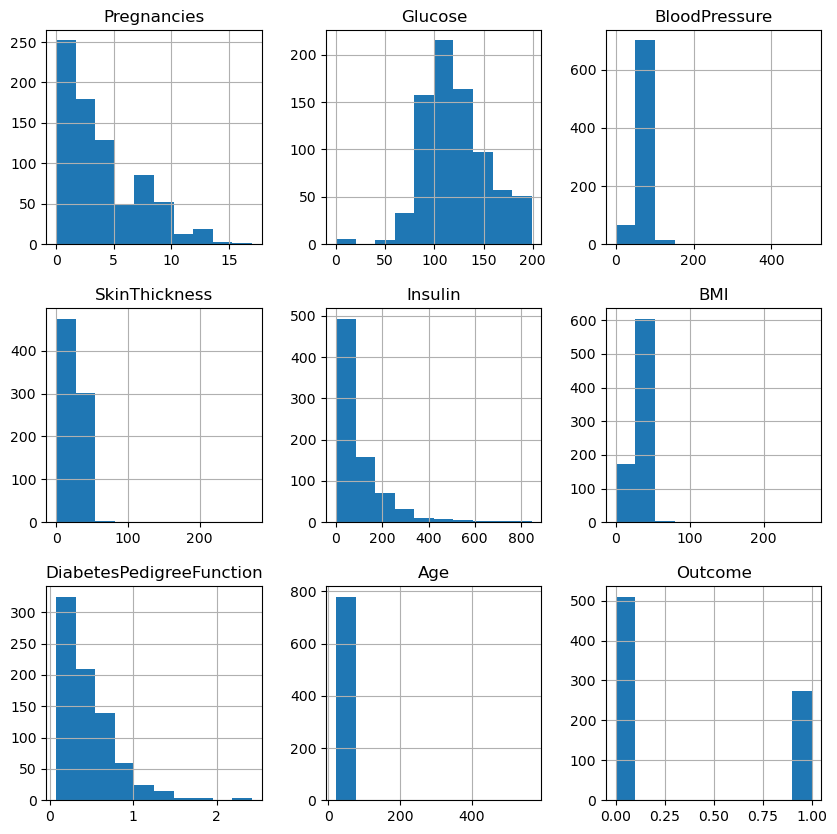

In [17]:
''' The data distribution and count are displayed in the histograms.
Some intriguing findings include: - There are many missing values and values with 0 where 0 is not appropriate. Take blood pressure, DiabetesPedigreeFunction, glucose, insulin, and skin thickness as examples.
 - Another intriguing finding is that the missing value with the entry of 0 is what is noted as an outlier below the minimum in the box plot and histogram. 
Some anticipated findings:
 - There are more non-diabetics than diabetics - The missing data for glucose skew the image to the right. - The outliers skew the histograms in some of the statistics, including age, BMI, blood pressure, and skin thickness.
'''
data.hist(figsize=(10,10))
plt.show()


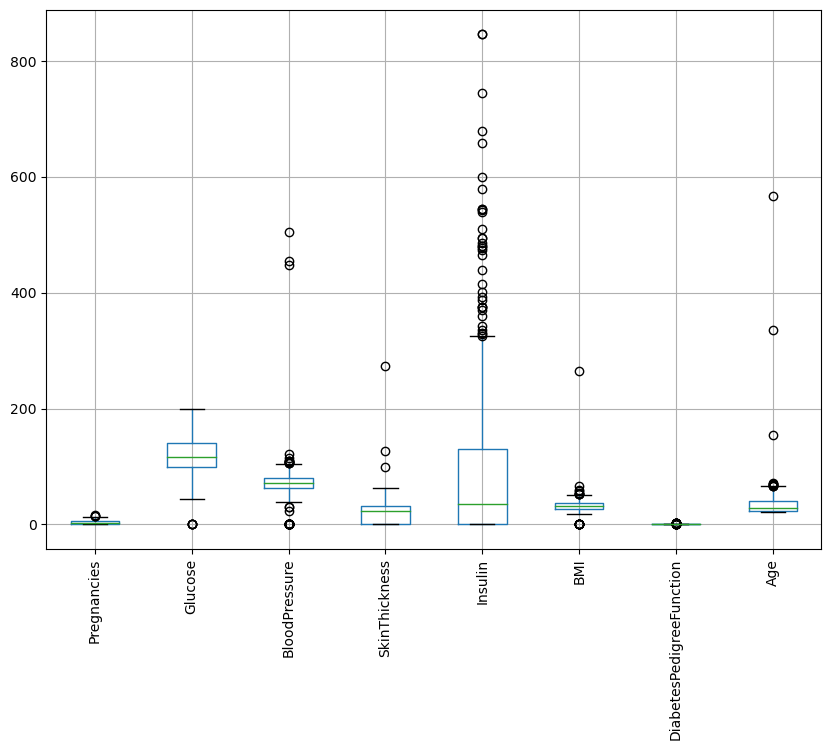

In [26]:
'''This representation makes the outlier data, as well as the 25%, mean, 75%, and maximum, very evident.
Interesting finding:
    - The insulin data contains many outliers. 
    - The age is greater than 150, which is erroneous.
    - A BMI of 200 or above is likewise unreasonable.
    - Blood Pressure: 400 or higher '''

data_no_outcome = data.drop('Outcome', axis=1)  # Exclude 'Outcome' column

plt.figure(figsize=(10, 7))
data_no_outcome.boxplot()
plt.xticks(rotation=90)
plt.show()



## Data Quality
The data clearly has problems with missing values, duplicate data, and outliers upon closer examination. Some entries have implausible values that don't make sense in the context they are used in, such as zeros for blood pressure, insulin, skin thickness, BMI, or glucose. For accurate analysis, these difficulties must be addressed.

Dropping them without handling them would result in substantial data loss. An alternative is to use the existing data's mean to fill in any missing numbers.

By eliminating these duplicate rows, there are 15 rows that are identical across all columns.
In the insulin feature in particular, outliers are seen. Outliers should be dealt with because they can skew the statistics. 
One strategy is to replace outliers with the dataset's mean or median, with the median being preferable to prevent the skewness brought on by outlie

In [27]:
# Calculates the maximum number from which a feature is greater than is considered an outlier 
def outlier_calculator(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    IQR = q3 - q1
    outlier = q3 + 1.5 * IQR
    return outlier

In [35]:
# get the outliers of the data 
outlier = outlier_calculator(data)

# loop through the data and select the outliers 
ourlierCounter = pd.DataFrame(columns= data.columns)
for i in data.loc[:,data.columns!='Outcome']:
    ourlierCounter = ourlierCounter.append((data.loc[data[i] > outlier[i]]))
    
# drop the duplicates because one data could be an outlier in multiple places     
ourlierCounter.drop_duplicates(inplace=True)

# there are 94 outliers 
len(ourlierCounter)

94

In [36]:
# There are 35 0 values 
len(data.loc[data['BloodPressure']==0])

#There are 380 0s in insulin column. A person wouldn't have an insulin level of 0 while alive,
#therefore the 0 represents a missing value. 
len(data.loc[data['Insulin']==0])

#There are 232 0s in SkinThickness column. A person wouldn't have an SkinThickness level of 0.
len(data.loc[data['SkinThickness']==0])

#There are 11 BMI columns that are 0
len(data.loc[data['BMI']==0])

# 5 where glucose is 0 
len(data.loc[data['Glucose']==0])

5

In [37]:
#There are 15 duplicate rows 
len(data[data.duplicated()])

15

##  Explore the relationships among the features

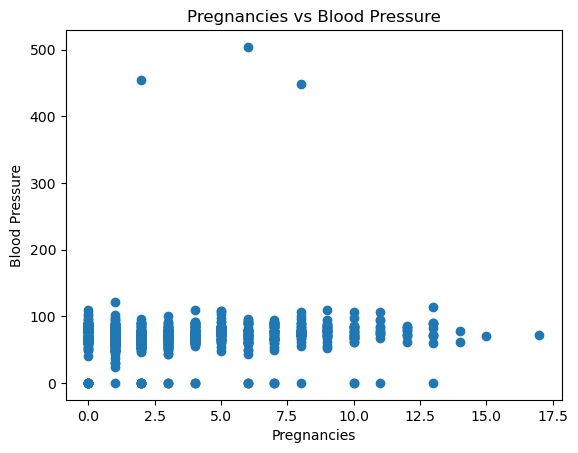

In [40]:
'''The number of pregnancies a woman has had has no effect on her blood pressure. 
'''
plt.scatter(data['Pregnancies'], data['BloodPressure'])
plt.xlabel('Pregnancies')
plt.ylabel('Blood Pressure')
plt.title('Pregnancies vs Blood Pressure')

plt.show()


Text(0.5, 1.0, 'BMI vs Blood Pressure')

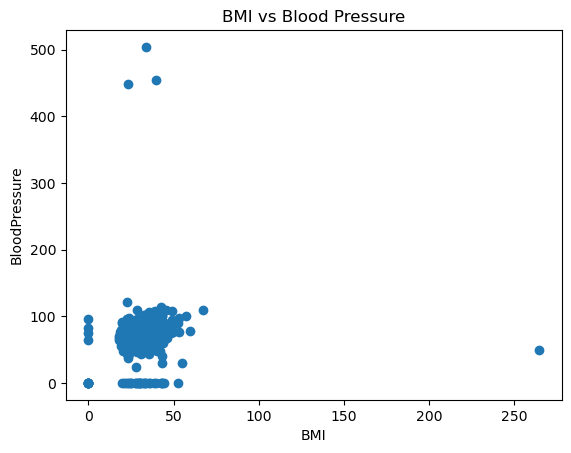

In [42]:
'''""" Using a scatterplot doesn't provide as much information regarding correlation because BMI, Age, and Blood Pressure have such a large outlier.
'''
plt.scatter(data['BMI'], data['BloodPressure'])
plt.xlabel('BMI')
plt.ylabel('BloodPressure')
plt.title('BMI vs Blood Pressure')

Text(0.5, 1.0, 'Age vs Blood Pressure')

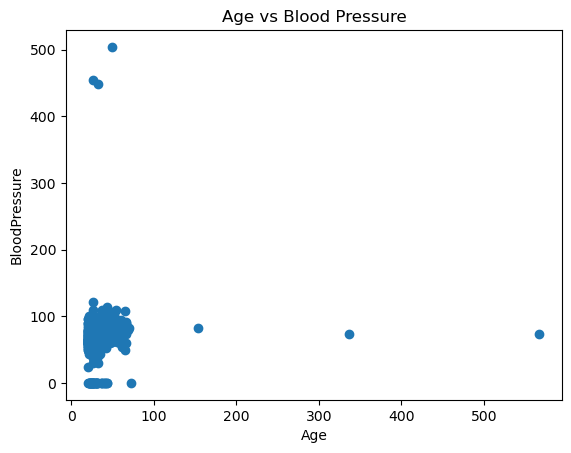

In [43]:
plt.scatter(data['Age'], data['BloodPressure'])
plt.xlabel('Age')
plt.ylabel('BloodPressure')
plt.title('Age vs Blood Pressure')

Text(0.5, 1.0, 'Insulin vs Glucose')

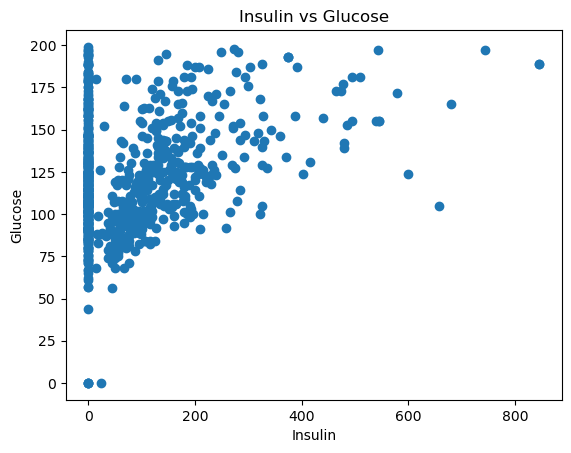

In [44]:
""" Glucose levels rise as insulin levels do. 
The scatter plot also displays the missing value. """

plt.scatter(data['Insulin'], data['Glucose'])
plt.xlabel('Insulin')
plt.ylabel('Glucose')
plt.title('Insulin vs Glucose')

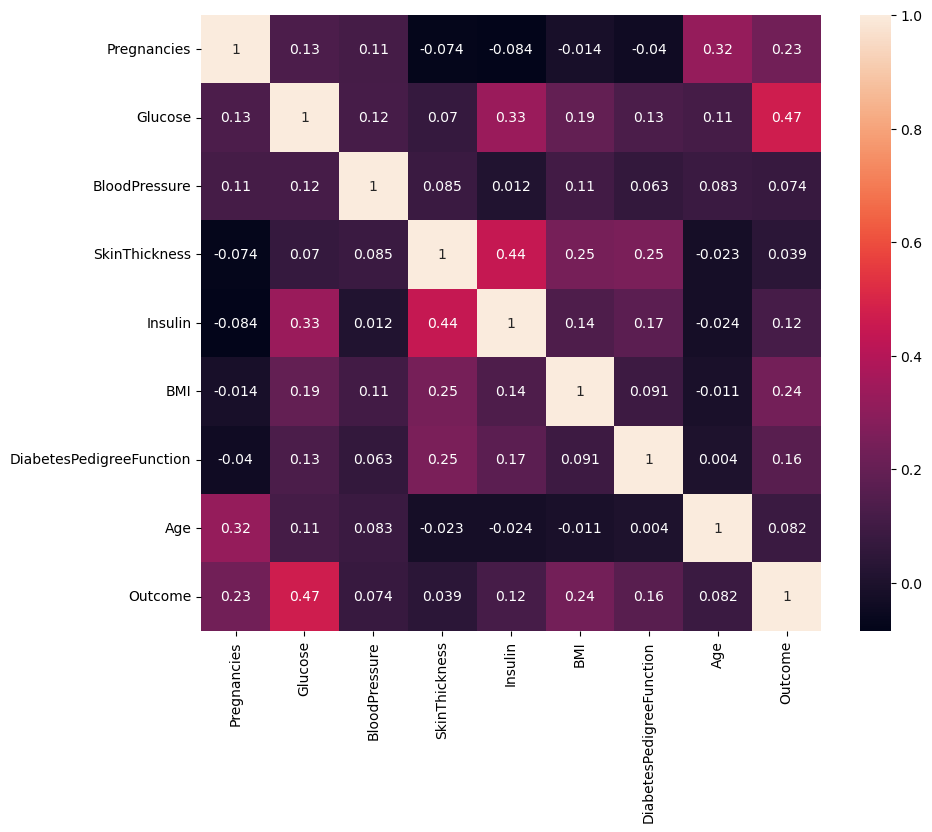

In [48]:
'''Expected Finding: 
    - Age and pregnancies significantly correlate with one another. Given that pregnancy is typically restricted to a certain age range, that seems reasonable. 
    - Insulin levels and glucose levels are connected. Given their close proximity, this is to be expected.
    - Skin thickness and BMI are also related. This is not surprising because a significantly obese person's skin tends to thicken. 
Interesting Observation: - Although the largest correlation is between skin thickness and BMI, this finding is somewhat predicted, it is nevertheless intriguing to note that this is the most strongly linearly correlated characteristic.'''
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), annot =True); #heatmap

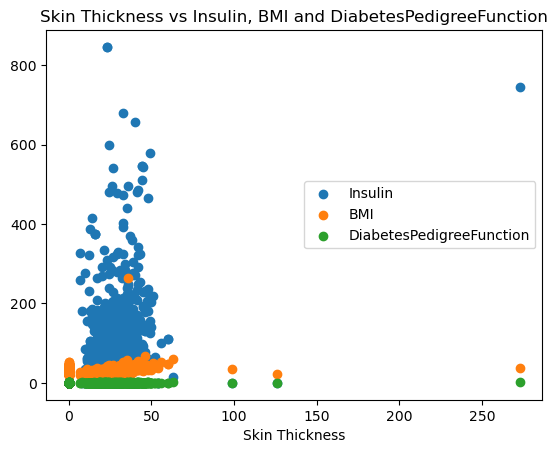

In [62]:
'''
There is an association between skin thickness and insulin, BMI, and diabetes, as can also be observed in the correlation matrix.PedigreeFunction
After dealing with the outliers, the link might be more visible, but it is still there. 
'''
import matplotlib.pyplot as plt

plt.scatter(data['SkinThickness'], data['Insulin'], label='Insulin')
plt.scatter(data['SkinThickness'], data['BMI'], label='BMI')
plt.scatter(data['SkinThickness'], data['DiabetesPedigreeFunction'], label='DiabetesPedigreeFunction')

plt.xlabel('Skin Thickness')
plt.legend()
plt.title('Skin Thickness vs Insulin, BMI and DiabetesPedigreeFunction')

plt.show()


## Locating any intriguing connections between the result attribute and the other attributes and explaining them.




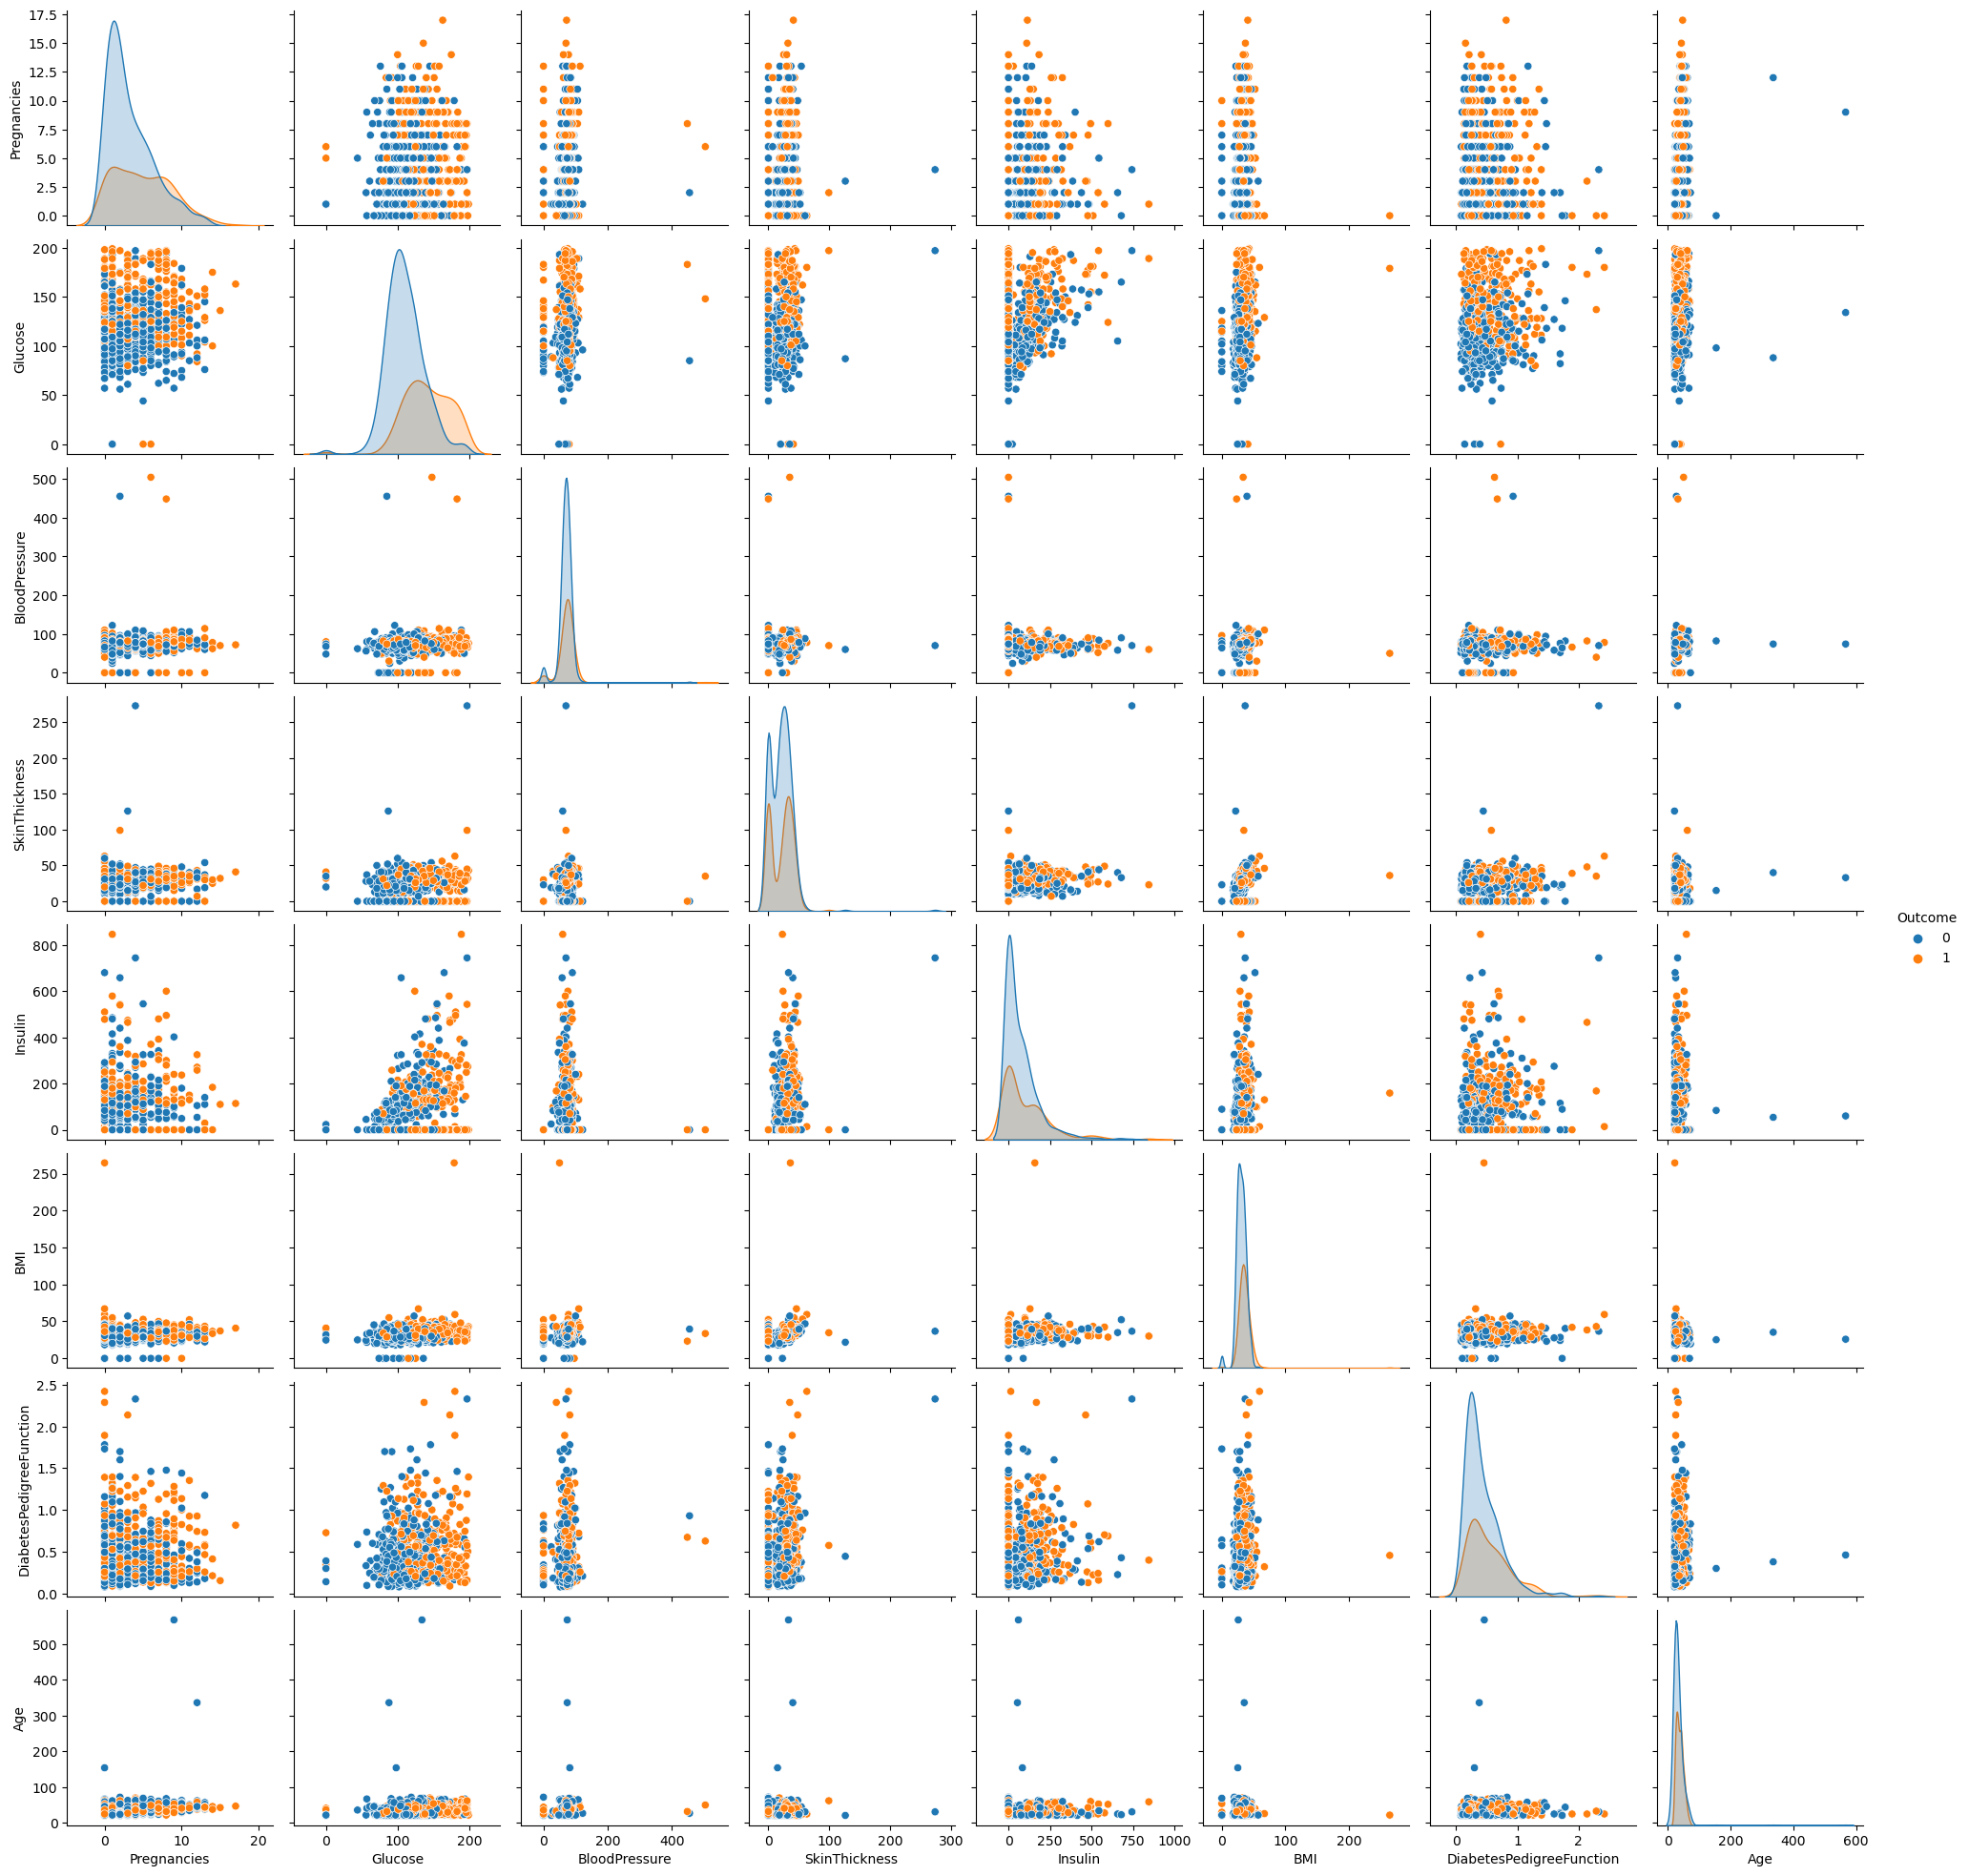

In [66]:
sns.pairplot(data,hue='Outcome')


The correlation matrix in the preceding section's section shows that the outcome and glucose and insulin are highly connected. 
This shouldn't come as a big surprise as these two characteristics are strongly related to diabetes. Then, it is related to age and BMI. 
These are all to be anticipated since they all contribute to diabetes.


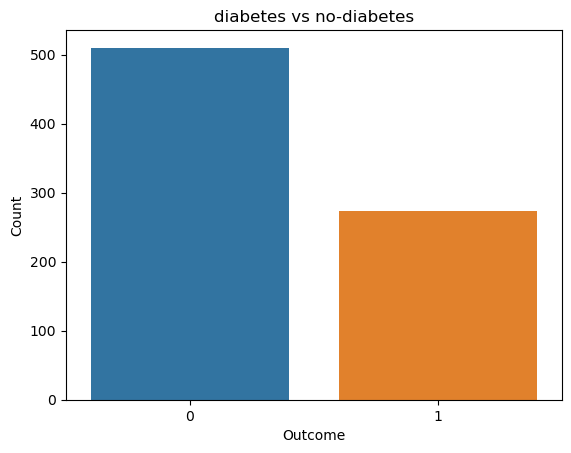

In [70]:
# Count of diabetes and no diabetes
sns.countplot(data=data, x='Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('diabetes vs no-diabetes')
plt.show()

In [71]:
'''
Create a datacopy with BMI categorized and group BMI values into categories
'''
dataCopy = data.copy()
dataCopy.loc[dataCopy['BMI'] < 18.5, 'BMICategory' ] = '0. BelowAverage'
dataCopy.loc[(dataCopy['BMI'] >= 18.5) & (dataCopy['BMI'] <= 24.9), 'BMICategory' ] = '1. Healthy'
dataCopy.loc[(dataCopy['BMI'] >= 25.0) & (dataCopy['BMI'] <= 29.9), 'BMICategory' ] = '2. Overweight'
dataCopy.loc[dataCopy['BMI'] >= 30.0, 'BMICategory' ] = '3. Obese'

<AxesSubplot:xlabel='BMICategory'>

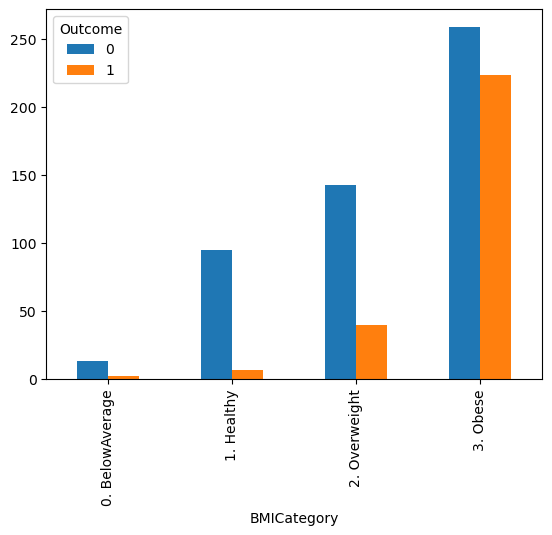

In [72]:
'''In this dataset, there are a number of women that are classified as obese by BMI.Let's investigate further to determine the proportion of obese women with diabetes.
'''
BMIOutcomeCrossTab = pd.crosstab(dataCopy['BMICategory'], dataCopy['Outcome'])
BMIOutcomeCrossTab.plot(kind='bar')

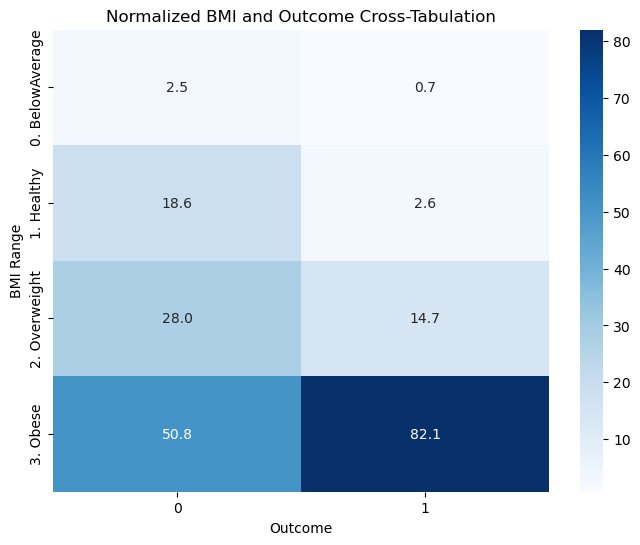

Outcome,0,1
BMICategory,,
0. BelowAverage,2.549020,0.732601
1. Healthy,18.627451,2.564103
2. Overweight,28.039216,14.652015
3. Obese,50.784314,82.051282


In [74]:
'''According to the prior graph, many diabetic women fall into the obese BMI index category. Let's take a look at how many obese individuals also have diabetes. According to the crosstab below, 82% of diabetic women are fat.
'''
BMIOutcomeCrossTabNormalized = pd.crosstab(dataCopy['BMICategory'], dataCopy['Outcome'], normalize='columns')

# multiply by a hundred to show percent
BMIOutcomeCrossTabNormalized = BMIOutcomeCrossTabNormalized * 100
plt.figure(figsize=(8, 6))
sns.heatmap(BMIOutcomeCrossTabNormalized, annot=True, cmap='Blues', fmt=".1f")
plt.xlabel('Outcome')
plt.ylabel('BMI Range')
plt.title('Normalized BMI and Outcome Cross-Tabulation')
plt.show()
BMIOutcomeCrossTabNormalized

## Data Analysis

## Data Prep

In [75]:
""" Data preparation and cleanup 

"""
CleanData = data.copy()

CleanData.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5.0,144,82.0,26.0,285.0,32.0,0.452,58.0,1
1,5.0,137,108.0,0.0,0.0,48.8,0.227,37.0,1
2,5.0,109,75.0,26.0,0.0,36.0,0.546,60.0,0
3,3.0,113,50.0,10.0,85.0,29.5,0.626,25.0,0
4,2.0,96,68.0,13.0,49.0,21.1,0.647,26.0,0
...,...,...,...,...,...,...,...,...,...
778,1.0,71,48.0,18.0,76.0,20.4,0.323,22.0,0
779,2.0,112,78.0,50.0,140.0,39.4,0.175,24.0,0
780,0.0,138,0.0,0.0,0.0,36.3,0.933,25.0,1
781,4.0,183,0.0,0.0,0.0,28.4,0.212,36.0,1


In [87]:
#Removing the missing data to calculate the median 
empty_data= CleanData.loc[(CleanData['BloodPressure']!=0) & (CleanData['BMI'] != 0) & (CleanData['Insulin']!=0) & (CleanData['SkinThickness'] != 0)]

In [88]:
#Calculate the median of the data with outcome 0
Median_NoDib= empty_data.loc[(empty_data ['Outcome'] == 0)].median()  
#Calculate the median of the data with outcome 1
Median_Dib = empty_data.loc[(empty_data ['Outcome'] == 1)].median()

In [89]:
# Find the outlier cut off and replace anything above that value with median from respective group
outlier = outlier_calculator(CleanData)
for i in CleanData.loc[:,CleanData.columns!='Outcome']:
    CleanData.loc[(data[i] >= outlier[i]) & (CleanData['Outcome'] == 1) , i] = Median_Dib[i]
    CleanData.loc[(data[i] >= outlier[i]) & (CleanData['Outcome'] == 0) , i] = Median_NoDib [i]

In [90]:
     #Calculate the mean of the data with outcome 0
# Run no empty again with the new data set 
empty_data= CleanData.loc[(CleanData['BloodPressure']!=0) & (CleanData['BMI'] != 0) & (CleanData['Insulin']!=0) & (CleanData['SkinThickness'] != 0)]

Median_NoDib = empty_data.loc[(empty_data['Outcome'] == 0)].mean()  
Median_Dib = empty_data.loc[(empty_data['Outcome'] == 1)].mean()  

missingData = ['BloodPressure', 'Insulin', 'SkinThickness', 'BMI', 'Glucose']
for i in missingData:
    CleanData.loc[(data[i] == 0) & (CleanData['Outcome'] == 0), i] = Median_NoDib [i]
    CleanData.loc[(data[i] == 0) & (CleanData['Outcome'] == 1), i] = Median_Dib [i]


In [91]:
CleanData.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000
mean,3.785441,122.070977,71.882237,27.534736,120.424902,32.216888,0.410158,32.060026,0.348659
std,3.269239,30.852342,11.218136,6.973549,39.644008,6.370545,0.219145,10.128975,0.476850
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,25.000000,105.294493,27.600000,0.242000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,27.000000,105.294493,32.000000,0.349000,28.000000,0.000000
75%,6.000000,142.000000,80.000000,31.328755,153.042722,36.300000,0.551000,39.000000,1.000000
max,13.000000,199.000000,102.000000,42.000000,235.000000,49.300000,1.022000,61.000000,1.000000


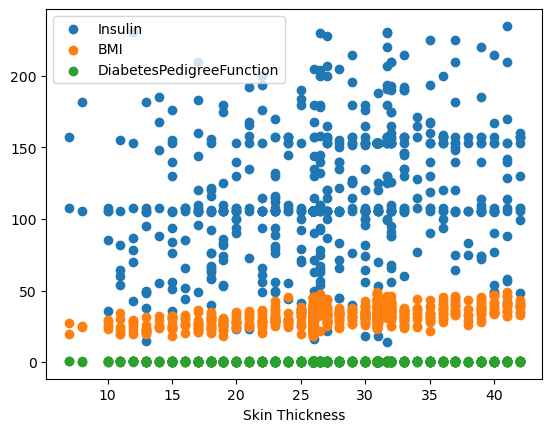

In [92]:
'''With the outliers imputed, the connections are now readily apparent. 

'''
plt.scatter(CleanData['SkinThickness'],CleanData['Insulin'], label='Insulin')
plt.scatter(CleanData['SkinThickness'],CleanData['BMI'], label='BMI')
plt.scatter(CleanData['SkinThickness'],CleanData['DiabetesPedigreeFunction'], label='DiabetesPedigreeFunction')

plt.xlabel('Skin Thickness')
plt.legend()

In [93]:
#Normalizing the data
def table(predicted_probs, labels, cutoff):
    """ Replacement for R's table funcion. """
    predicted_outcome = (predicted_probs > cutoff).astype(int)
    df = pd.DataFrame({"predicted_outcome": predicted_outcome, "actual_outcome": labels})
    return pd.crosstab(index=df["actual_outcome"], columns=df["predicted_outcome"], margins=False)

#calculate the accuracy of the matrix 
def accuracy(matrix):
    correct = matrix[0][0] + matrix[1][1]
    incorrect = matrix[1][0] + matrix [0][1]
    return (correct / (correct + incorrect)) * 100

In [94]:
#divide train and test data 
dataTrainNormalize = CleanData [:683]
dataTestNormalize = CleanData[683:783]

# divide feature and outcome for training 
dataTrainOutcomeNormalize = dataTrainNormalize[['Outcome']] 
dataTrainFeaturesNormalize = dataTrainNormalize.loc[:,dataTrainNormalize.columns!='Outcome'] 

# divide feature and outcome for testing
dataTestOutcomeNormalize = dataTestNormalize[['Outcome']] #np.asarray(dataTest['Outcome'])
dataTestFeaturesNormalize = dataTestNormalize.loc[:,dataTestNormalize.columns!='Outcome'] #np.asarray(dataTest.drop('Outcome',1))

# Normalizing data 
mean = np.mean(dataTrainFeaturesNormalize, axis=0)
std = np.std(dataTestFeaturesNormalize, axis=0)

trainData = (dataTrainFeaturesNormalize - mean)/std
testData = (dataTestFeaturesNormalize - mean)/std

## Fit a logistic regression model

In [121]:
# Divide test and train data 
dataTrain = CleanData [:683]
dataTest = CleanData[683:783]

# Divide outcome and predictors for training data 
dataTrainOutcome = dataTrain[['Outcome']] 
dataTrainFeatures = dataTrain.loc[:,dataTrain.columns!='Outcome'] 

# Divide outcome and predictors for testing data 
dataTestOutcome = dataTest[['Outcome']] 
dataTestFeatures = dataTest.loc[:,dataTest.columns!='Outcome']

In [122]:
dataTrainFeatures
dataTestFeatures

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
683,1.0,110.907324,68.000000,35.000000,105.294493,32.0,0.389,22.0
684,0.0,151.000000,90.000000,31.657509,153.042722,42.1,0.371,21.0
685,13.0,126.000000,90.000000,30.943639,153.042722,43.4,0.583,42.0
686,1.0,110.907324,48.000000,20.000000,105.294493,24.7,0.140,22.0
687,9.0,165.000000,88.000000,30.943639,153.042722,30.4,0.302,49.0
...,...,...,...,...,...,...,...,...
778,1.0,71.000000,48.000000,18.000000,76.000000,20.4,0.323,22.0
779,2.0,112.000000,78.000000,26.461460,140.000000,39.4,0.175,24.0
780,0.0,138.000000,74.438237,30.943639,153.042722,36.3,0.933,25.0
781,4.0,183.000000,74.438237,30.943639,153.042722,28.4,0.212,36.0


In [123]:
# Fit the model and summary
testModel = sm.Logit(dataTrainOutcome, sm.add_constant(dataTrainFeatures)).fit()
print(testModel.summary())


Optimization terminated successfully.
         Current function value: 0.368279
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  683
Model:                          Logit   Df Residuals:                      674
Method:                           MLE   Df Model:                            8
Date:                Sun, 02 Jul 2023   Pseudo R-squ.:                  0.4235
Time:                        18:10:22   Log-Likelihood:                -251.53
converged:                       True   LL-Null:                       -436.34
Covariance Type:            nonrobust   LLR p-value:                 5.883e-75
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -13.1705      1.194    -11.028      0.000     -15.511

In [124]:
# predict with the test data 
# misclassification table  
predict = testModel.predict(sm.add_constant(dataTestFeatures))
table(predict,dataTestOutcome['Outcome'],0.5)


predicted_outcome,0,1
actual_outcome,,
0,51,6
1,8,35


In [125]:
# calculate accuracy
print("Accuracy:",accuracy(table(predict,dataTestOutcome['Outcome'],0.5)))

Accuracy: 86.0


Area Under Curve: 0.9102407180742554


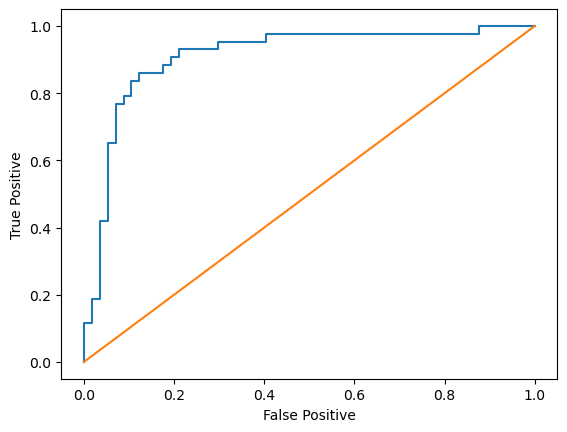

In [126]:
# Calculate the false positive, true positive and treshold - this will later be used for the ROC curve 
falsePositive, truePositive, treshholds = roc_curve(dataTestOutcome, predict)

# calculate area under the curve 
areaUnderCurve = auc(falsePositive, truePositive)
print('Area Under Curve:', areaUnderCurve)

# plot the ROC 
plt.plot(falsePositive, truePositive)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.plot([0,1], [0,1])


## ROC
The ROC curve is a graphical tool used to assess the effectiveness of a classification model. By changing the classification threshold (here, we just did one, you can try different ones and test them), it demonstrates how effectively the model can discriminate between positive and negative cases. In order to maximize the true positive rate and reduce the false positive rate, the curve plots the true positive rate against the false positive rate. The model's overall performance is gauged by the area under the ROC curve (AUC). Better categorization accuracy is indicated by a higher AUC.


## Logistic regression for Normalized data

In [127]:
testModel = sm.Logit(dataTrainOutcomeNormalize, sm.add_constant(trainData)).fit()
print(testModel.summary())

Optimization terminated successfully.
         Current function value: 0.368279
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  683
Model:                          Logit   Df Residuals:                      674
Method:                           MLE   Df Model:                            8
Date:                Sun, 02 Jul 2023   Pseudo R-squ.:                  0.4235
Time:                        18:10:25   Log-Likelihood:                -251.53
converged:                       True   LL-Null:                       -436.34
Covariance Type:            nonrobust   LLR p-value:                 5.883e-75
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.2948      0.134     -9.679      0.000      -1.557

In [128]:
predict1 = testModel.predict(sm.add_constant(testData))
table(predict1,dataTestOutcomeNormalize['Outcome'],0.5)

predicted_outcome,0,1
actual_outcome,,
0,51,6
1,8,35


In [129]:
print("Accuracy:",accuracy(table(predict1,dataTestOutcomeNormalize['Outcome'],0.5)))


Accuracy: 86.0


Area Under Curve: 0.9102407180742554


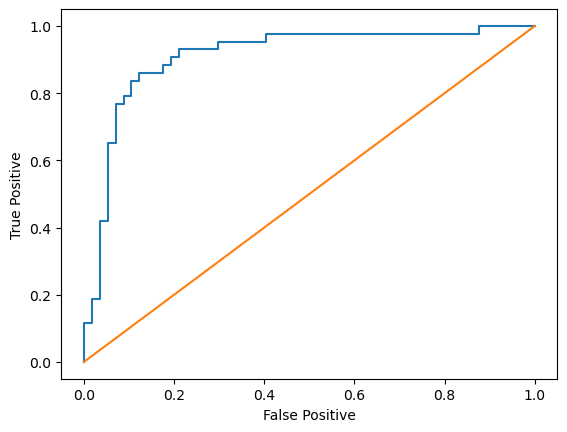

In [130]:
falsePositiveNormalize, truePositiveNormalize, treshholdsNormalize = roc_curve(dataTestOutcomeNormalize, predict1)

areaUnderCurveNormalized = auc(falsePositiveNormalize, truePositiveNormalize)
print('Area Under Curve:', areaUnderCurveNormalized)

plt.plot(falsePositiveNormalize, truePositiveNormalize)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.plot([0,1], [0,1])

We can observe from the area under the curve that the model applies to any data, normalized or not.




## Conclusion

In conclusion, the Pima Indian dataset study has provided insightful information on the variables affecting diabetes among women of Pima Indian background. The results show that some characteristics, such glucose and insulin levels, have a considerable influence on the presence of diabetes. Compared to other criteria like age, these characteristics have a greater impact in determining diabetes status. For women with Pima Indian origin, this information can be used to create more efficient strategies for diabetes prevention, early detection, and individualized healthcare interventions. To better understand diabetes and improve healthcare outcomes for this population, additional study and analysis can delve deeper into these issues.

